# Gold Price Prediction using Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('FINAL_USO.csv')

In [3]:
df

Date        Open        High         Low       Close   Adj Close  \
0     2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
1     2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2     2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
3     2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
4     2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   
...          ...         ...         ...         ...         ...         ...   
1713  2018-12-24  119.570000  120.139999  119.570000  120.019997  120.019997   
1714  2018-12-26  120.620003  121.000000  119.570000  119.660004  119.660004   
1715  2018-12-27  120.570000  120.900002  120.139999  120.570000  120.570000   
1716  2018-12-28  120.800003  121.080002  120.720001  121.059998  121.059998   
1717  2018-12-31  120.980003  121.260002  120.830002  121.250000  121.250000   

        Volume     SP_open     SP_high      SP_low  ...    GDX_Low  GDX_Close  \
0     21521900  123.029999  123.199997  121.989998  ...  51.570000  51.680000   
1     18124300  122.230003  122.949997  121.300003  ...  52.040001  52.680000   
2     12547200  122.059998  122.320000  120.029999  ...  51.029999  51.169998   
3      9136300  122.180000  124.139999  120.370003  ...  52.369999  52.990002   
4     11996100  123.930000  124.360001  122.750000  ...  52.419998  52.959999   
...        ...         ...         ...         ...  ...        ...        ...   
1713   9736400  239.039993  240.839996  234.270004  ...  20.650000  21.090000   
1714  14293500  235.970001  246.179993  233.759995  ...  20.530001  20.620001   
1715  11874400  242.570007  248.289993  238.960007  ...  20.700001  20.969999   
1716   6864700  249.580002  251.399994  246.449997  ...  20.570000  20.600000   
1717   8449400  249.559998  250.190002  247.470001  ...  20.559999  21.090000   

      GDX_Adj Close  GDX_Volume   USO_Open   USO_High    USO_Low  USO_Close  \
0         48.973877    20605600  36.900002  36.939999  36.049999  36.130001   
1         49.921513    16285400  36.180000  36.500000  35.730000  36.270000   
2         48.490578    15120200  36.389999  36.450001  35.930000  36.200001   
3         50.215282    11644900  37.299999  37.610001  37.220001  37.560001   
4         50.186852     8724300  37.669998  38.240002  37.520000  38.110001   
...             ...         ...        ...        ...        ...        ...   
1713      21.090000    60507000   9.490000   9.520000   9.280000   9.290000   
1714      20.620001    76365200   9.250000   9.920000   9.230000   9.900000   
1715      20.969999    52393000   9.590000   9.650000   9.370000   9.620000   
1716      20.600000    49835000   9.540000   9.650000   9.380000   9.530000   
1717      21.090000    53866600   9.630000   9.710000   9.440000   9.660000   

      USO_Adj Close  USO_Volume  
0         36.130001    12616700  
1         36.270000    12578800  
2         36.200001     7418200  
3         37.560001    10041600  
4         38.110001    10728000  
...             ...         ...  
1713       9.290000    21598200  
1714       9.900000    40978800  
1715       9.620000    36578700  
1716       9.530000    22803400  
1717       9.660000    28417400  

[1718 rows x 81 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

# checking missing values

In [5]:
df.isna().sum().value_counts()

0    81
dtype: int64

In [6]:
df.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 81, dtype: int64

In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

In [8]:
df.duplicated().value_counts()

False    1718
dtype: int64

In [9]:
df.drop_duplicates()

Date        Open        High         Low       Close   Adj Close  \
0     2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
1     2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2     2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
3     2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
4     2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   
...          ...         ...         ...         ...         ...         ...   
1713  2018-12-24  119.570000  120.139999  119.570000  120.019997  120.019997   
1714  2018-12-26  120.620003  121.000000  119.570000  119.660004  119.660004   
1715  2018-12-27  120.570000  120.900002  120.139999  120.570000  120.570000   
1716  2018-12-28  120.800003  121.080002  120.720001  121.059998  121.059998   
1717  2018-12-31  120.980003  121.260002  120.830002  121.250000  121.250000   

        Volume     SP_open     SP_high      SP_low  ...    GDX_Low  GDX_Close  \
0     21521900  123.029999  123.199997  121.989998  ...  51.570000  51.680000   
1     18124300  122.230003  122.949997  121.300003  ...  52.040001  52.680000   
2     12547200  122.059998  122.320000  120.029999  ...  51.029999  51.169998   
3      9136300  122.180000  124.139999  120.370003  ...  52.369999  52.990002   
4     11996100  123.930000  124.360001  122.750000  ...  52.419998  52.959999   
...        ...         ...         ...         ...  ...        ...        ...   
1713   9736400  239.039993  240.839996  234.270004  ...  20.650000  21.090000   
1714  14293500  235.970001  246.179993  233.759995  ...  20.530001  20.620001   
1715  11874400  242.570007  248.289993  238.960007  ...  20.700001  20.969999   
1716   6864700  249.580002  251.399994  246.449997  ...  20.570000  20.600000   
1717   8449400  249.559998  250.190002  247.470001  ...  20.559999  21.090000   

      GDX_Adj Close  GDX_Volume   USO_Open   USO_High    USO_Low  USO_Close  \
0         48.973877    20605600  36.900002  36.939999  36.049999  36.130001   
1         49.921513    16285400  36.180000  36.500000  35.730000  36.270000   
2         48.490578    15120200  36.389999  36.450001  35.930000  36.200001   
3         50.215282    11644900  37.299999  37.610001  37.220001  37.560001   
4         50.186852     8724300  37.669998  38.240002  37.520000  38.110001   
...             ...         ...        ...        ...        ...        ...   
1713      21.090000    60507000   9.490000   9.520000   9.280000   9.290000   
1714      20.620001    76365200   9.250000   9.920000   9.230000   9.900000   
1715      20.969999    52393000   9.590000   9.650000   9.370000   9.620000   
1716      20.600000    49835000   9.540000   9.650000   9.380000   9.530000   
1717      21.090000    53866600   9.630000   9.710000   9.440000   9.660000   

      USO_Adj Close  USO_Volume  
0         36.130001    12616700  
1         36.270000    12578800  
2         36.200001     7418200  
3         37.560001    10041600  
4         38.110001    10728000  
...             ...         ...  
1713       9.290000    21598200  
1714       9.900000    40978800  
1715       9.620000    36578700  
1716       9.530000    22803400  
1717       9.660000    28417400  

[1718 rows x 81 columns]

# Effect of Index prices on gold rates (Visualization with a plot)

In [11]:
GLD_adj_close = df['Adj Close']
SPY_adj_close = df['SP_Ajclose']
DJ_adj_close  = df['DJ_Ajclose']

In [12]:
df_p=pd.DataFrame({"GLd":GLD_adj_close,"SPY":SPY_adj_close,"DJ":DJ_adj_close})

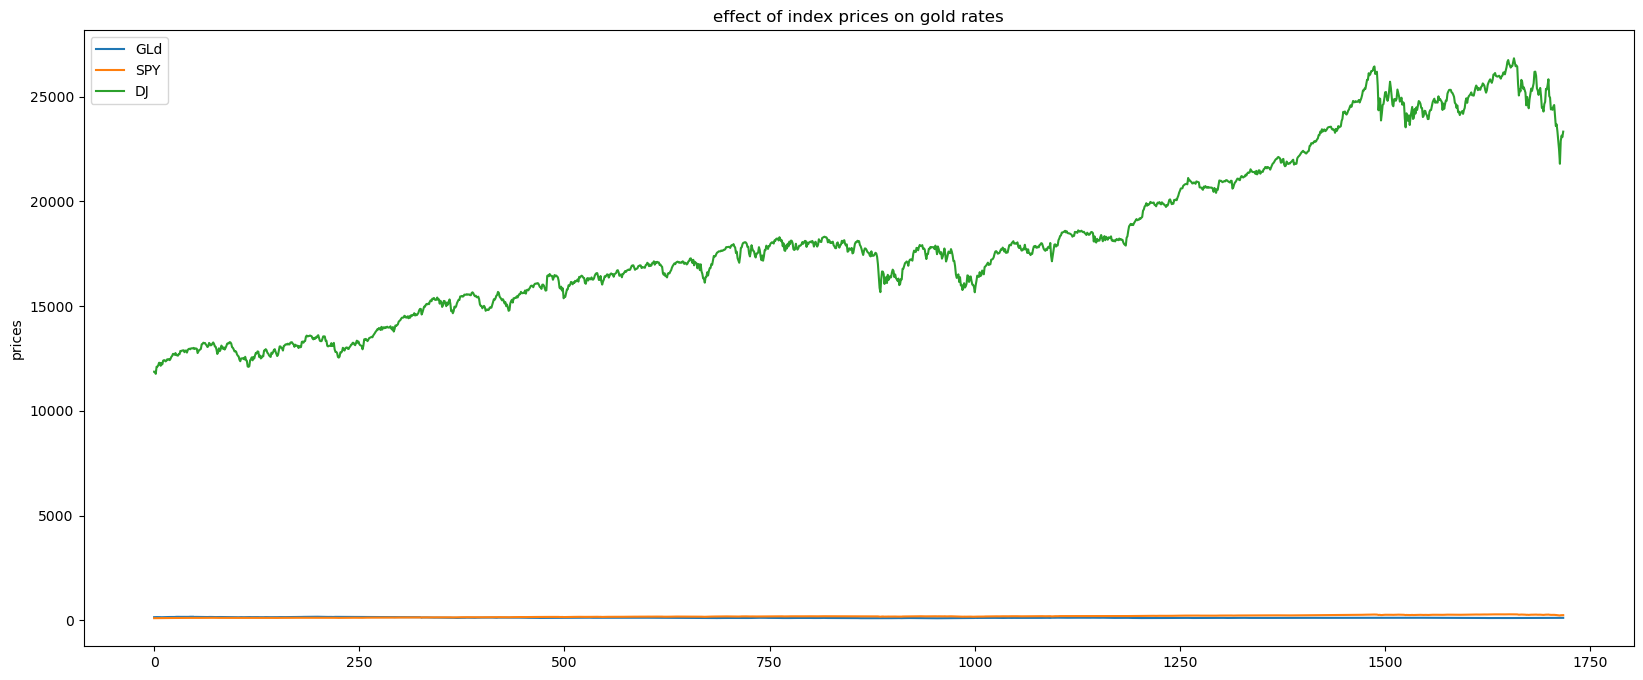

In [13]:
df_px=df_p.plot(title="effect of index prices on gold rates", figsize=(20,8))
df_px.set_ylabel("prices")
df_px.legend(loc="upper left")
plt.show()

# Scatterplot (for Adj Close and SP_Ajclose)

<AxesSubplot:xlabel='Adj Close', ylabel='SP_Ajclose'>

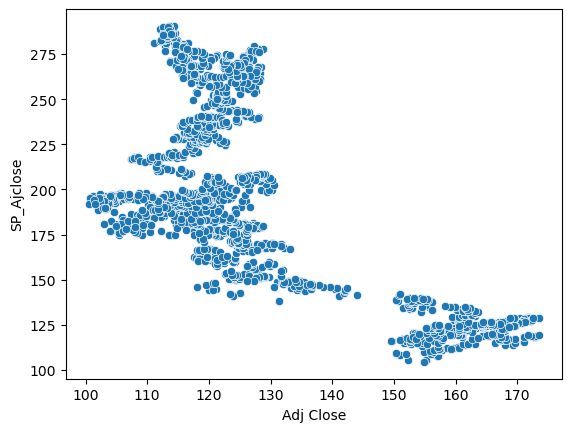

In [14]:
sns.scatterplot(x='Adj Close', y='SP_Ajclose',data=df)

# Find Out Positively Correlated Variables and Negatively Correlated variables.

In [16]:
df.corr()

Open      High       Low     Close  Adj Close    Volume  \
Open           1.000000  0.999515  0.999442  0.998976   0.998976  0.251921   
High           0.999515  1.000000  0.999262  0.999535   0.999535  0.261064   
Low            0.999442  0.999262  1.000000  0.999532   0.999532  0.237031   
Close          0.998976  0.999535  0.999532  1.000000   1.000000  0.246778   
Adj Close      0.998976  0.999535  0.999532  1.000000   1.000000  0.246778   
...                 ...       ...       ...       ...        ...       ...   
USO_High       0.634864  0.637208  0.633623  0.635311   0.635311  0.083064   
USO_Low        0.634277  0.636538  0.633140  0.634732   0.634732  0.080475   
USO_Close      0.635138  0.637483  0.633994  0.635675   0.635675  0.081642   
USO_Adj Close  0.635138  0.637483  0.633994  0.635675   0.635675  0.081642   
USO_Volume    -0.455920 -0.454913 -0.457628 -0.456193  -0.456193  0.069580   

                SP_open   SP_high    SP_low  SP_close  ...   GDX_Low  \
Open          -0.684314 -0.684597 -0.683464 -0.683998  ...  0.975479   
High          -0.688118 -0.688365 -0.687325 -0.687817  ...  0.975650   
Low           -0.680911 -0.681242 -0.679988 -0.680567  ...  0.975337   
Close         -0.684618 -0.684904 -0.683750 -0.684284  ...  0.975561   
Adj Close     -0.684618 -0.684904 -0.683750 -0.684284  ...  0.975561   
...                 ...       ...       ...       ...  ...       ...   
USO_High      -0.774626 -0.775482 -0.773550 -0.774799  ...  0.614587   
USO_Low       -0.771235 -0.772154 -0.770087 -0.771396  ...  0.613844   
USO_Close     -0.773099 -0.773957 -0.771928 -0.773159  ...  0.614733   
USO_Adj Close -0.773099 -0.773957 -0.771928 -0.773159  ...  0.614733   
USO_Volume     0.375568  0.377996  0.371390  0.374658  ... -0.429839   

               GDX_Close  GDX_Adj Close  GDX_Volume  USO_Open  USO_High  \
Open            0.974596       0.974098   -0.514230  0.634872  0.634864   
High            0.975341       0.974746   -0.508782  0.637101  0.637208   
Low             0.974568       0.974182   -0.519988  0.633591  0.633623   
Close           0.975459       0.974980   -0.514616  0.635197  0.635311   
Adj Close       0.975459       0.974980   -0.514616  0.635197  0.635311   
...                  ...            ...         ...       ...       ...   
USO_High        0.614766       0.600523   -0.522581  0.999857  1.000000   
USO_Low         0.613931       0.599819   -0.523956  0.999848  0.999818   
USO_Close       0.614915       0.600756   -0.523801  0.999699  0.999867   
USO_Adj Close   0.614915       0.600756   -0.523801  0.999699  0.999867   
USO_Volume     -0.426553      -0.421065    0.498816 -0.699000 -0.695678   

                USO_Low  USO_Close  USO_Adj Close  USO_Volume  
Open           0.634277   0.635138       0.635138   -0.455920  
High           0.636538   0.637483       0.637483   -0.454913  
Low            0.633140   0.633994       0.633994   -0.457628  
Close          0.634732   0.635675       0.635675   -0.456193  
Adj Close      0.634732   0.635675       0.635675   -0.456193  
...                 ...        ...            ...         ...  
USO_High       0.999818   0.999867       0.999867   -0.695678  
USO_Low        1.000000   0.999879       0.999879   -0.702665  
USO_Close      0.999879   1.000000       1.000000   -0.699221  
USO_Adj Close  0.999879   1.000000       1.000000   -0.699221  
USO_Volume    -0.702665  -0.699221      -0.699221    1.000000  

[80 rows x 80 columns]

<AxesSubplot:>

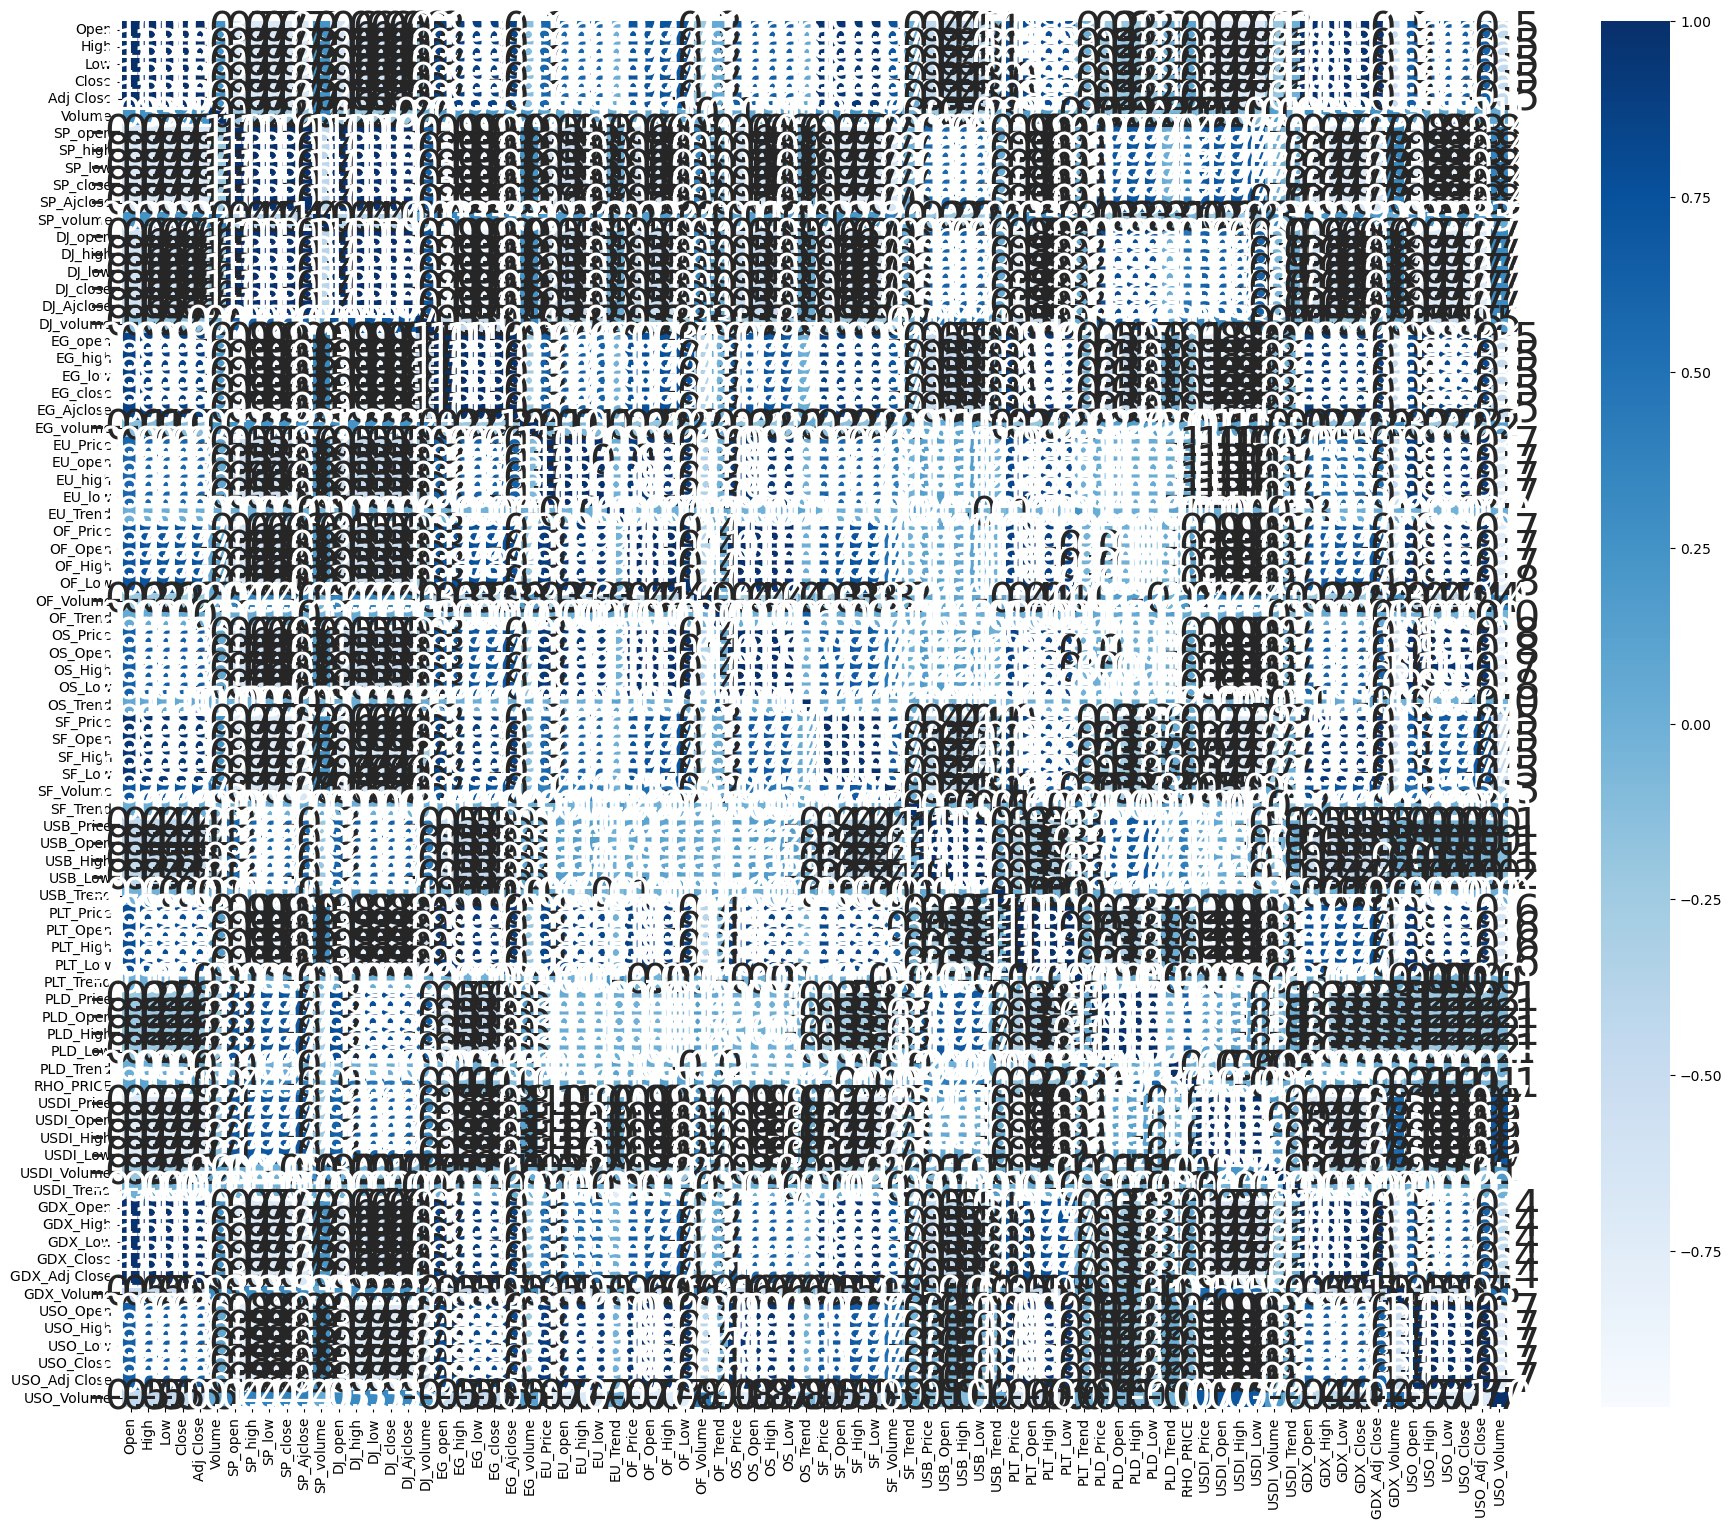

In [17]:
correlation=df.corr()
plt.figure(figsize=(24,18))
sns.heatmap(correlation,cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':30}, cmap='Blues')

<AxesSubplot:>

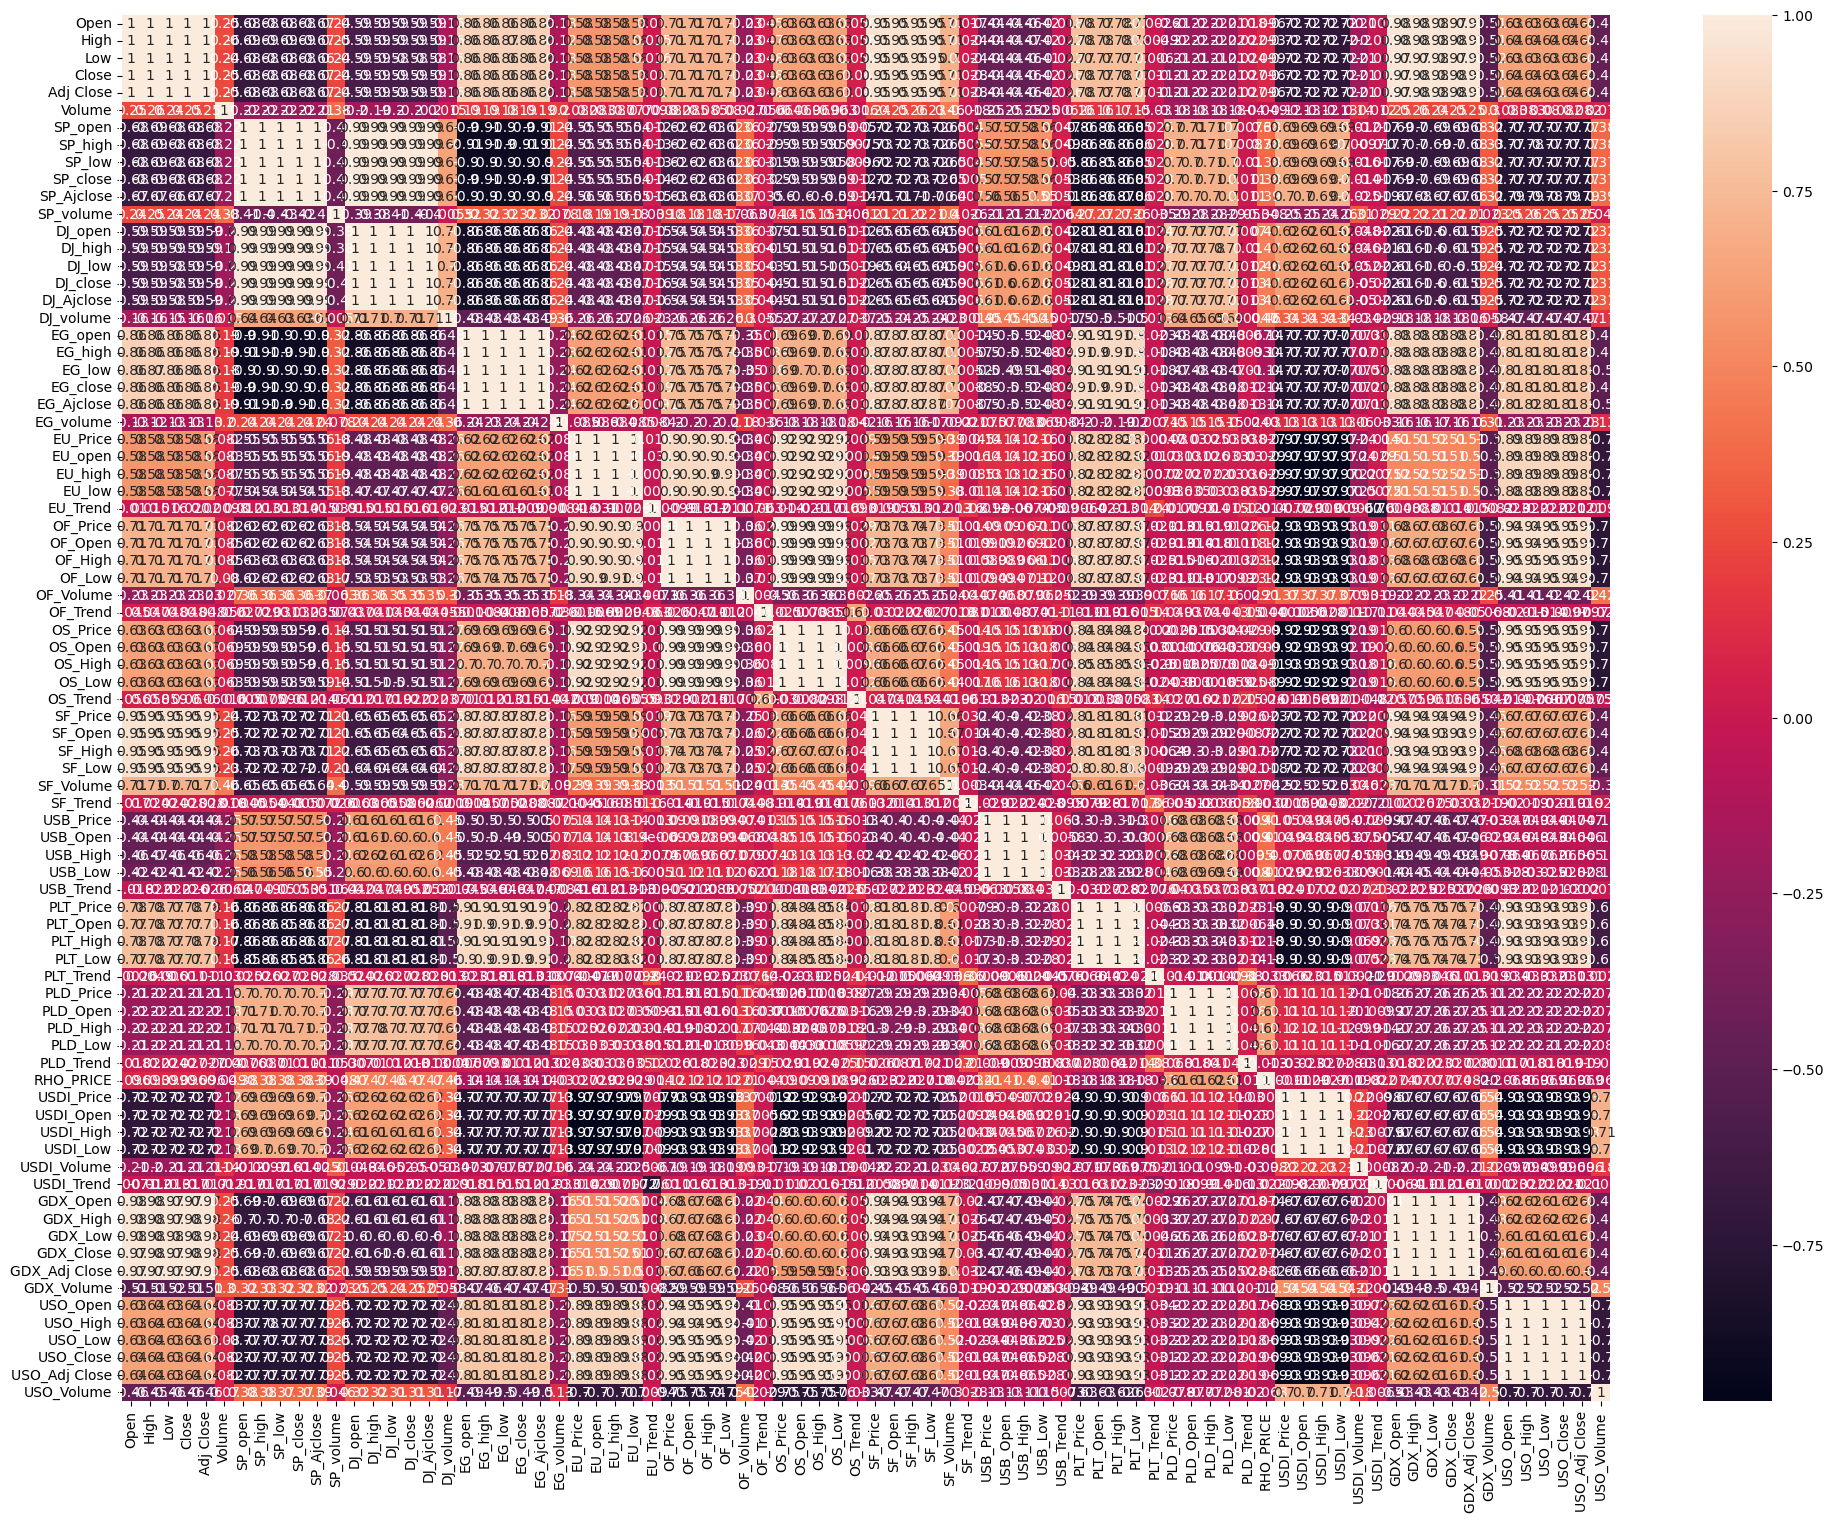

In [18]:
plt.figure(figsize=(24,18)) 
sns.heatmap(df.corr(), annot=True) 

In [19]:
corelation_matrix=df.corr()
coer=corelation_matrix["Adj Close"].sort_values(ascending=False)

In [20]:
coer

Close         1.000000
Adj Close     1.000000
High          0.999535
Low           0.999532
Open          0.998976
                ...   
SP_high      -0.684904
USDI_High    -0.720023
USDI_Open    -0.720140
USDI_Price   -0.721569
USDI_Low     -0.722078
Name: Adj Close, Length: 80, dtype: float64

* Negatively Correlated variables.

In [22]:
coe_e=coer[coer<0]

In [23]:
coe_e

USDI_Trend    -0.016641
USB_Trend     -0.025933
EG_volume     -0.126586
DJ_volume     -0.155526
USDI_Volume   -0.205954
PLD_Price     -0.213179
PLD_Low       -0.214919
PLD_Open      -0.216426
PLD_High      -0.217490
OF_Volume     -0.225436
USB_Low       -0.417352
USB_Open      -0.440822
USB_Price     -0.441347
USO_Volume    -0.456193
USB_High      -0.464116
GDX_Volume    -0.514616
DJ_low        -0.588157
DJ_Ajclose    -0.588411
DJ_close      -0.588411
DJ_high       -0.588778
DJ_open       -0.588800
SP_Ajclose    -0.666071
SP_low        -0.683750
SP_close      -0.684284
SP_open       -0.684618
SP_high       -0.684904
USDI_High     -0.720023
USDI_Open     -0.720140
USDI_Price    -0.721569
USDI_Low      -0.722078
Name: Adj Close, dtype: float64

* Positively Correlated Variables

In [25]:
coe_p=coer[coer>0]

In [26]:
coe_p

Close            1.000000
Adj Close        1.000000
High             0.999535
Low              0.999532
Open             0.998976
GDX_Low          0.975561
GDX_Close        0.975459
GDX_High         0.975255
GDX_Adj Close    0.974980
GDX_Open         0.974824
SF_Low           0.947842
SF_Price         0.947420
SF_Open          0.945557
SF_High          0.945203
EG_low           0.863917
EG_open          0.862900
EG_close         0.862770
EG_high          0.861479
EG_Ajclose       0.859850
PLT_Price        0.775861
PLT_High         0.775481
PLT_Low          0.773993
PLT_Open         0.773760
OF_High          0.711334
OF_Price         0.710693
OF_Open          0.709096
OF_Low           0.708266
SF_Volume        0.706505
USO_Adj Close    0.635675
USO_Close        0.635675
USO_High         0.635311
USO_Open         0.635197
USO_Low          0.634732
OS_High          0.632001
OS_Price         0.630817
OS_Open          0.630046
OS_Low           0.629083
EU_high          0.582969
EU_Price    

# Create a Dataset and Include Major columns.

In [28]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

In [29]:
categorical_features=list(df.select_dtypes(include="object").columns)

In [30]:
numerical_features=list(df.select_dtypes(exclude="object").columns)

In [31]:
numerical_features

['Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'SP_open',
 'SP_high',
 'SP_low',
 'SP_close',
 'SP_Ajclose',
 'SP_volume',
 'DJ_open',
 'DJ_high',
 'DJ_low',
 'DJ_close',
 'DJ_Ajclose',
 'DJ_volume',
 'EG_open',
 'EG_high',
 'EG_low',
 'EG_close',
 'EG_Ajclose',
 'EG_volume',
 'EU_Price',
 'EU_open',
 'EU_high',
 'EU_low',
 'EU_Trend',
 'OF_Price',
 'OF_Open',
 'OF_High',
 'OF_Low',
 'OF_Volume',
 'OF_Trend',
 'OS_Price',
 'OS_Open',
 'OS_High',
 'OS_Low',
 'OS_Trend',
 'SF_Price',
 'SF_Open',
 'SF_High',
 'SF_Low',
 'SF_Volume',
 'SF_Trend',
 'USB_Price',
 'USB_Open',
 'USB_High',
 'USB_Low',
 'USB_Trend',
 'PLT_Price',
 'PLT_Open',
 'PLT_High',
 'PLT_Low',
 'PLT_Trend',
 'PLD_Price',
 'PLD_Open',
 'PLD_High',
 'PLD_Low',
 'PLD_Trend',
 'RHO_PRICE',
 'USDI_Price',
 'USDI_Open',
 'USDI_High',
 'USDI_Low',
 'USDI_Volume',
 'USDI_Trend',
 'GDX_Open',
 'GDX_High',
 'GDX_Low',
 'GDX_Close',
 'GDX_Adj Close',
 'GDX_Volume',
 'USO_Open',
 'USO_High',
 'USO_Low',
 'USO_Close',


In [32]:
categorical_features

['Date']

In [35]:
df[numerical_features].isna().any()

Open             False
High             False
Low              False
Close            False
Adj Close        False
                 ...  
USO_High         False
USO_Low          False
USO_Close        False
USO_Adj Close    False
USO_Volume       False
Length: 80, dtype: bool

In [37]:
df[numerical_features].isnull().sum()

Open             0
High             0
Low              0
Close            0
Adj Close        0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 80, dtype: int64

In [38]:
# changing the date columns into date time

In [40]:
df["Date"]=pd.to_datetime(df["Date"])
df["year"]=df["Date"].dt.year
df["month"]=df["Date"].dt.month
df["day"]=df["Date"].dt.day
df.drop("Date", axis=1, inplace=True)
df.head()

Open        High         Low       Close   Adj Close    Volume  \
0  154.740005  154.949997  151.710007  152.330002  152.330002  21521900   
1  154.309998  155.369995  153.899994  155.229996  155.229996  18124300   
2  155.479996  155.860001  154.360001  154.869995  154.869995  12547200   
3  156.820007  157.429993  156.580002  156.979996  156.979996   9136300   
4  156.979996  157.529999  156.130005  157.160004  157.160004  11996100   

      SP_open     SP_high      SP_low    SP_close  ...  GDX_Volume   USO_Open  \
0  123.029999  123.199997  121.989998  122.180000  ...    20605600  36.900002   
1  122.230003  122.949997  121.300003  121.589996  ...    16285400  36.180000   
2  122.059998  122.320000  120.029999  120.290001  ...    15120200  36.389999   
3  122.180000  124.139999  120.370003  123.930000  ...    11644900  37.299999   
4  123.930000  124.360001  122.750000  124.169998  ...     8724300  37.669998   

    USO_High    USO_Low  USO_Close  USO_Adj Close  USO_Volume  year  month  \
0  36.939999  36.049999  36.130001      36.130001    12616700  2011     12   
1  36.500000  35.730000  36.270000      36.270000    12578800  2011     12   
2  36.450001  35.930000  36.200001      36.200001     7418200  2011     12   
3  37.610001  37.220001  37.560001      37.560001    10041600  2011     12   
4  38.240002  37.520000  38.110001      38.110001    10728000  2011     12   

   day  
0   15  
1   16  
2   19  
3   20  
4   21  

[5 rows x 83 columns]

# Splitting Data into X and Y

In [41]:
x=df.drop("Adj Close",axis=1)

In [42]:
y=df["Adj Close"]

In [43]:
x

Open        High         Low       Close    Volume     SP_open  \
0     154.740005  154.949997  151.710007  152.330002  21521900  123.029999   
1     154.309998  155.369995  153.899994  155.229996  18124300  122.230003   
2     155.479996  155.860001  154.360001  154.869995  12547200  122.059998   
3     156.820007  157.429993  156.580002  156.979996   9136300  122.180000   
4     156.979996  157.529999  156.130005  157.160004  11996100  123.930000   
...          ...         ...         ...         ...       ...         ...   
1713  119.570000  120.139999  119.570000  120.019997   9736400  239.039993   
1714  120.620003  121.000000  119.570000  119.660004  14293500  235.970001   
1715  120.570000  120.900002  120.139999  120.570000  11874400  242.570007   
1716  120.800003  121.080002  120.720001  121.059998   6864700  249.580002   
1717  120.980003  121.260002  120.830002  121.250000   8449400  249.559998   

         SP_high      SP_low    SP_close  SP_Ajclose  ...  GDX_Volume  \
0     123.199997  121.989998  122.180000  105.441238  ...    20605600   
1     122.949997  121.300003  121.589996  105.597549  ...    16285400   
2     122.320000  120.029999  120.290001  104.468536  ...    15120200   
3     124.139999  120.370003  123.930000  107.629784  ...    11644900   
4     124.360001  122.750000  124.169998  107.838242  ...     8724300   
...          ...         ...         ...         ...  ...         ...   
1713  240.839996  234.270004  234.339996  234.339996  ...    60507000   
1714  246.179993  233.759995  246.179993  246.179993  ...    76365200   
1715  248.289993  238.960007  248.070007  248.070007  ...    52393000   
1716  251.399994  246.449997  247.750000  247.750000  ...    49835000   
1717  250.190002  247.470001  249.919998  249.919998  ...    53866600   

       USO_Open   USO_High    USO_Low  USO_Close  USO_Adj Close  USO_Volume  \
0     36.900002  36.939999  36.049999  36.130001      36.130001    12616700   
1     36.180000  36.500000  35.730000  36.270000      36.270000    12578800   
2     36.389999  36.450001  35.930000  36.200001      36.200001     7418200   
3     37.299999  37.610001  37.220001  37.560001      37.560001    10041600   
4     37.669998  38.240002  37.520000  38.110001      38.110001    10728000   
...         ...        ...        ...        ...            ...         ...   
1713   9.490000   9.520000   9.280000   9.290000       9.290000    21598200   
1714   9.250000   9.920000   9.230000   9.900000       9.900000    40978800   
1715   9.590000   9.650000   9.370000   9.620000       9.620000    36578700   
1716   9.540000   9.650000   9.380000   9.530000       9.530000    22803400   
1717   9.630000   9.710000   9.440000   9.660000       9.660000    28417400   

      year  month  day  
0     2011     12   15  
1     2011     12   16  
2     2011     12   19  
3     2011     12   20  
4     2011     12   21  
...    ...    ...  ...  
1713  2018     12   24  
1714  2018     12   26  
1715  2018     12   27  
1716  2018     12   28  
1717  2018     12   31  

[1718 rows x 82 columns]

In [44]:
y

0       152.330002
1       155.229996
2       154.869995
3       156.979996
4       157.160004
           ...    
1713    120.019997
1714    119.660004
1715    120.570000
1716    121.059998
1717    121.250000
Name: Adj Close, Length: 1718, dtype: float64

# Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
ss=StandardScaler()

In [47]:
x=ss.fit_transform(x)

In [48]:
x

array([[ 1.56470383,  1.53725585,  1.433596  , ..., -1.98826796,
         1.59203883, -0.07542315],
       [ 1.5401627 ,  1.56108409,  1.5595192 , ..., -1.98826796,
         1.59203883,  0.03955198],
       [ 1.6069362 ,  1.58888418,  1.58596938, ..., -1.98826796,
         1.59203883,  0.38447736],
       ...,
       [-0.38542838, -0.39454288, -0.38166434, ...,  1.48211092,
         1.59203883,  1.30427838],
       [-0.37230177, -0.38433073, -0.3483145 , ...,  1.48211092,
         1.59203883,  1.41925351],
       [-0.36202891, -0.37411858, -0.34198949, ...,  1.48211092,
         1.59203883,  1.76417889]])

# Spliting Dataset into Traning set and Test set¶

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# Model Training

In [55]:
from sklearn.tree import DecisionTreeRegressor

In [56]:
dtr = DecisionTreeRegressor()

In [57]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [58]:
y_pred=dtr.predict(x_test)

In [59]:
y_pred

array([127.739998, 116.519997, 157.199997, 155.190002, 130.460007,
       115.029999, 127.449997, 164.440002, 119.470001, 107.790001,
       102.75    , 104.18    , 153.380005, 119.370003, 135.119995,
       116.07    , 121.580002, 115.190002, 127.400002, 105.      ,
       126.07    , 129.470001, 121.919998, 125.980003, 119.620003,
       113.07    , 112.57    , 111.540001, 162.020004, 122.120003,
       117.919998, 120.029999, 119.669998, 136.699997, 119.940002,
       108.699997, 114.120003, 124.599998, 131.759995, 161.380005,
       167.509995, 109.760002, 126.269997, 117.099998, 119.339996,
       118.769997, 119.879997, 120.949997, 115.790001, 119.940002,
       129.339996, 172.289993, 117.610001, 162.      , 120.620003,
       127.849998, 113.07    , 117.610001, 124.940002, 121.769997,
       121.18    , 114.470001, 112.57    , 121.18    , 121.129997,
       119.169998, 127.07    , 112.769997, 127.849998, 118.639999,
       124.57    , 125.440002, 165.070007, 121.580002, 160.559

In [65]:
from sklearn.metrics import r2_score

In [66]:
r2_score(y_pred,y_test)

0.9998510877379094